## Imports

In [5]:
%reload_ext autoreload
%autoreload 2

import torch
import matplotlib.pyplot as plt
import seaborn as sns
from transformer import *

import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica",
    "figure.dpi": 400,
    "figure.figsize": (8, 4),
})
sns.set(style="whitegrid")

## Training

In [6]:
# Example usage:
dim_input = 10
dim_hidden = 256
dim_output = 128
cosine_loss = False
lr = 1e-12 if cosine_loss else 1e-4

kwargs = {
    "num_outputs": 8,
    "num_inds": 64,
    "num_heads": 8,
    "cosine_loss": cosine_loss,
    "lr": lr,
    "lr_multiplicator": 1e-2,
    "tensor_length_min": 2**2,
    "tensor_length_max": 2**12,
    "use_deepset": False,
    "dtype": torch.float32
}


trainer = SetTransformerTrainer(dim_input, dim_hidden, dim_output, **kwargs)

In [8]:
trainer.load("./models/st_st_l2norm.torch")
# losses, losses_valid_perm, losses_invalid_perm = trainer.train(5000)

In [10]:
valid_perm_distances, invalid_perm_distances = trainer.test(iterations=1000, perm_threshold=1, only_valid_perms=False)

Testing...


Testing valid permutations: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 184.31it/s]


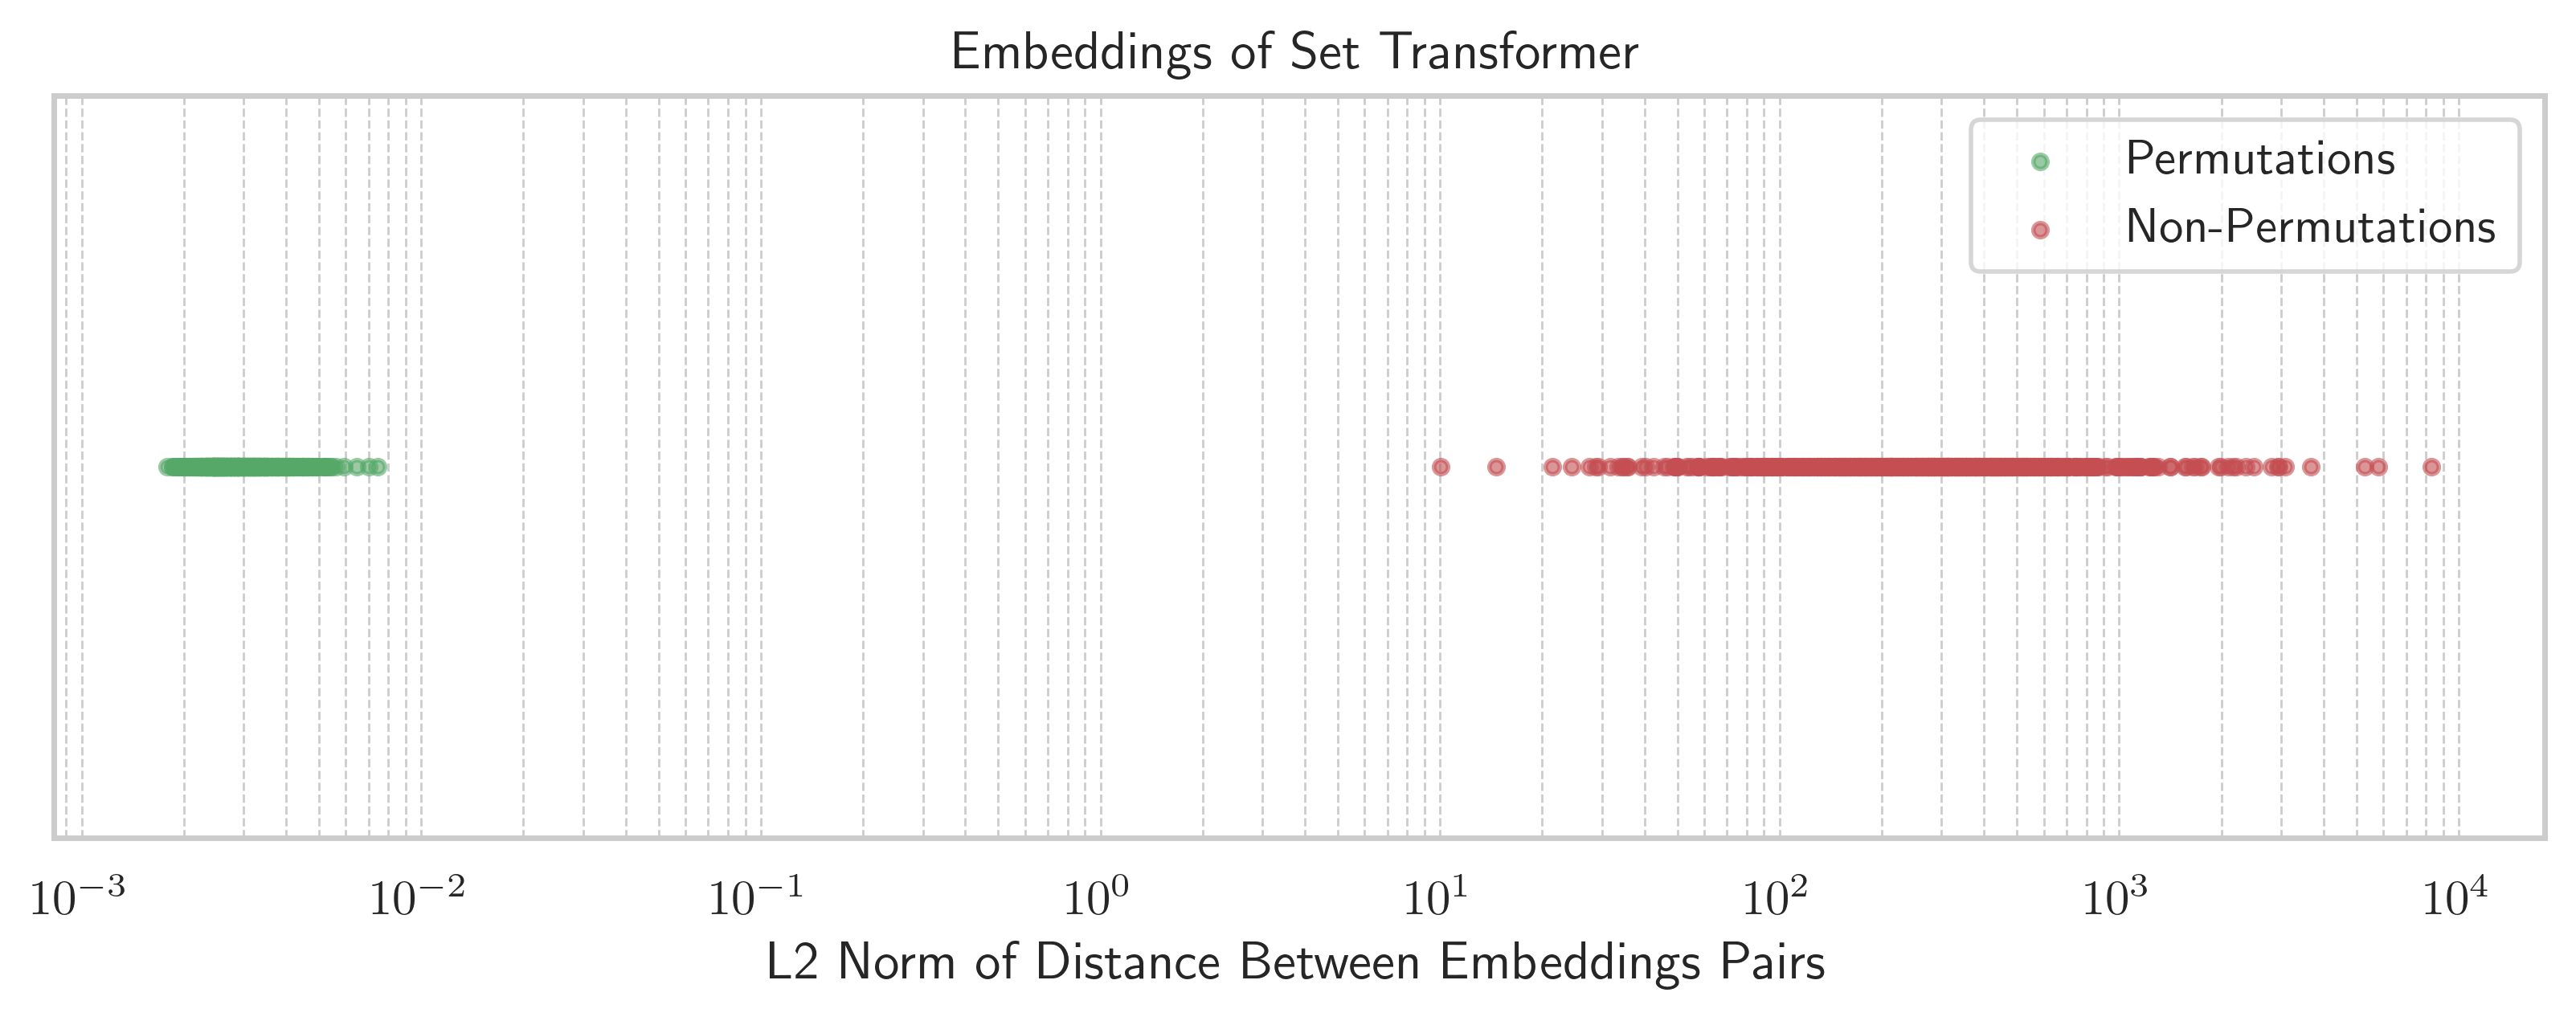

In [14]:
trainer.plot(valid_perm_distances, invalid_perm_distances, show_plot=True, save_path=None)

In [16]:
print(np.mean(valid_perm_distances), np.mean(invalid_perm_distances))
print(np.var(valid_perm_distances), np.var(invalid_perm_distances))

0.0030259921982651577 378.33074705505373
5.224734711434664e-07 237261.2364133124


## Testing

In [13]:
with torch.no_grad():
    points_per_tensor= np.random.randint(2**2, 2**15)
    x1, x2 = trainer.gen_data(points_per_tensor, permutation=True)

    with torch.no_grad():
        embedding_1 = trainer.model(x1).squeeze(0)
        embedding_2 = trainer.model(x2).squeeze(0)
    
    l2norm = torch.nn.PairwiseDistance(p=2, eps=0)
    
    # nicholas = (torch.abs(torch.sum(embedding_1**2) - torch.sum(embedding_2**2))).sqrt().item()
    l2norm_val = l2norm(embedding_1, embedding_2).item()
    print(l2norm_val)

0.002409805078059435


## Saved Models

In [ ]:
# st_nn_l2norm.torch

dim_input = 10
dim_hidden = 256
dim_output = 128

cosine_loss = False
lr = 1e-12 if cosine_loss else 1e-20

kwargs = {
    "cosine_loss": cosine_loss,
    "lr": lr,
    "lr_multiplicator": 1e-2,
    "tensor_length_min": 2**4,
    "tensor_length_max": 2**15,
    "use_deepset": True,
    "dtype": torch.float32
}



In [ ]:
# st_st_l2norm.torch

dim_input = 10
dim_hidden = 256
dim_output = 128
cosine_loss = False
lr = 1e-12 if cosine_loss else 1e-4

kwargs = {
    "num_outputs": 8,
    "num_inds": 64,
    "num_heads": 8,
    "cosine_loss": cosine_loss,
    "lr": lr,
    "lr_multiplicator": 1e-2,
    "tensor_length_min": 2**2,
    "tensor_length_max": 2**12,
    "use_deepset": False,
    "dtype": torch.float32
}